In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Load the datasets
train_df = pd.read_excel('train.xlsx')
test_df = pd.read_excel('test.xlsx')

# Display the data types of each column
print(train_df.dtypes)
print(test_df.dtypes)

# Check for non-numeric values in columns
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        print(f"Unique values in {col}: {train_df[col].unique()}")

# Define the categorical columns
categorical_cols = ['marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply one-hot encoding to categorical columns
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

# Ensure test data has the same columns as the training data
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# Align the columns in the test data with the training data
test_df = test_df[train_df.columns.drop('responded')]


custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded          object
profit            float64
id                float64
dtype: object
custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           objec

In [22]:
# Define numeric columns based on your dataset after encoding
numeric_cols = ['custAge', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']

# Convert numeric columns to numeric types and handle missing values
for col in numeric_cols:
    if col in train_df.columns:
        train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
        train_df[col].fillna(train_df[col].mean(), inplace=True)
    if col in test_df.columns:
        test_df[col] = pd.to_numeric(test_df[col], errors='coerce')
        test_df[col].fillna(test_df[col].mean(), inplace=True)

# Verify the conversion
print(train_df.dtypes)
print(test_df.dtypes)


custAge                 float64
profession               object
schooling                object
campaign                float64
pdays                   float64
previous                float64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
pmonths                 float64
pastEmail               float64
responded                object
profit                  float64
id                      float64
marital_married           uint8
marital_single            uint8
marital_unknown           uint8
default_unknown           uint8
default_yes               uint8
housing_unknown           uint8
housing_yes               uint8
loan_unknown              uint8
loan_yes                  uint8
contact_telephone         uint8
month_aug                 uint8
month_dec                 uint8
month_jul                 uint8
month_jun                 uint8
month_mar                 uint8
month_ma

In [28]:
train_df.responded.fillna(train_df.responded.dropna().max(),inplace=True)
train_df.id.fillna(train_df.id.dropna().max(),inplace=True)

# Separate features and target variable
X = train_df.drop(columns=['responded', 'id'])
y = train_df['responded']

# Apply Random Over-Sampling to balance the data
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Verify the balancing
print(y_res.value_counts())


no     7310
yes    7310
Name: responded, dtype: int64


In [29]:
# Feature Engineering: Example of creating a new feature
X_res['custAge_group'] = pd.cut(X_res['custAge'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
test_df['custAge_group'] = pd.cut(test_df['custAge'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

# Convert newly created categorical feature into dummy/indicator variables
X_res = pd.get_dummies(X_res, columns=['custAge_group'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['custAge_group'], drop_first=True)


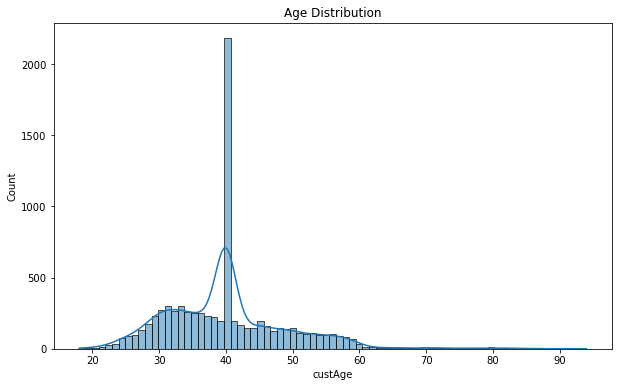

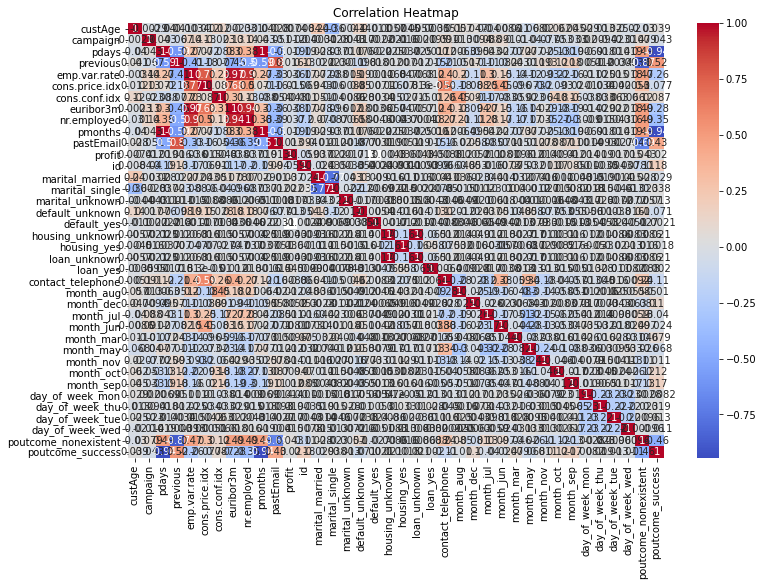

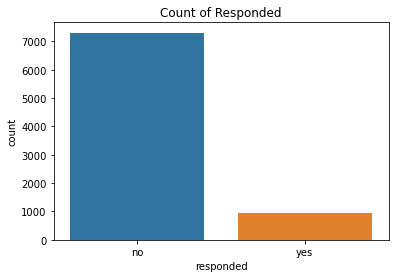

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of custAge
plt.figure(figsize=(10, 6))
sns.histplot(train_df['custAge'], kde=True)
plt.title('Age Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Count plot of the target variable 'responded'
plt.figure(figsize=(6, 4))
sns.countplot(x='responded', data=train_df)
plt.title('Count of Responded')
plt.show()


In [28]:
!pip install imbalanced-learn



In [31]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# data
train_df = pd.DataFrame({
    'marital': [1, 2, 3, 4, 5, 6],
    'housing': [10, 20, 30, 40, 50, 60],
    'profession': [0, 1, 0, 1, 0, 1]
})

# Split features and target variable
X = train_df[['marital', 'housing']]
y = train_df['profession']

# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print('type:', type(train_df['profession']))

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


type: <class 'pandas.core.series.Series'>


RandomForestClassifier(random_state=42)

In [35]:
# Predict on validation set
y_pred = clf.predict(X_val)

# Evaluate the model
print('Accuracy:', accuracy_score(y_val, y_pred))
print('Classification Report:')
print(classification_report(y_val, y_pred, zero_division=0))


Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

